In [1]:
import os
import re
import pandas as pd

from matplotlib import pyplot as plt


In [2]:
tests_path = 'tests/'
files = os.listdir(tests_path)
files


['node-1-workers.csv', 'node-2-workers.csv']

In [3]:
# df = pd.DataFrame()
# for file in files:
#   numWorkes = re.search(r'node-(\d+)-workers.csv', file)
#   temp = pd.read_csv(tests_path + file, index_col=0)
#   temp['created_at'] = pd.to_datetime(temp['created_at'])
#   tempo_inicial = temp['created_at'].min()
#   temp['created_at'] = (temp['created_at'] - tempo_inicial).dt.total_seconds()
#   temp['workers'] = numWorkes.group(1)
#   temp['workers'] = temp['workers'].astype(int)
#   df = pd.concat([df, temp])


In [4]:
df = pd.DataFrame()
for file in files: 
  numWorkes = re.search(r'node-(\d+)-workers.csv', file)
  temp = pd.read_csv(tests_path + file, index_col=0)
  temp['created_at'] = pd.to_datetime(temp['created_at'])
  temp['workers'] = numWorkes.group(1)
  temp['workers'] = temp['workers'].astype(int)

  df = pd.concat([df, temp])


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 4 to 9992
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   nome        20000 non-null  object        
 1   descricao   20000 non-null  object        
 2   valores     20000 non-null  object        
 3   created_at  20000 non-null  datetime64[ns]
 4   workers     20000 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 859.4+ KB


In [6]:
df.head()

,nome,descricao,valores,created_at,workers
id,,,,,
4,User 3,Descrição do usuário 3,"{170,164,158,153}",2023-10-26 20:09:41.195803,1
6,User 4,Descrição do usuário 4,"{183,115,132,103}",2023-10-26 20:09:41.195387,1
5,User 7,Descrição do usuário 7,"{147,142,174,172}",2023-10-26 20:09:41.195160,1
13,User 15,Descrição do usuário 15,"{116,115,190,190}",2023-10-26 20:09:41.246068,1
17,User 17,Descrição do usuário 17,"{160,130,136,141}",2023-10-26 20:09:41.246954,1


In [7]:
df['workers'].value_counts()

1    10000
2    10000
Name: workers, dtype: int64

In [8]:
df['created_at'].min()

Timestamp('2023-10-26 20:09:41.193080')

In [9]:
normalized_time_df = df.copy()

In [10]:
difference = df[df['workers'] == 1]['created_at'].min() - df[df['workers'] == 2]['created_at'].min()
normalized_time_df.loc[normalized_time_df['workers'] == 2,
                       'created_at'] = normalized_time_df[normalized_time_df['workers'] == 2]['created_at'] + difference


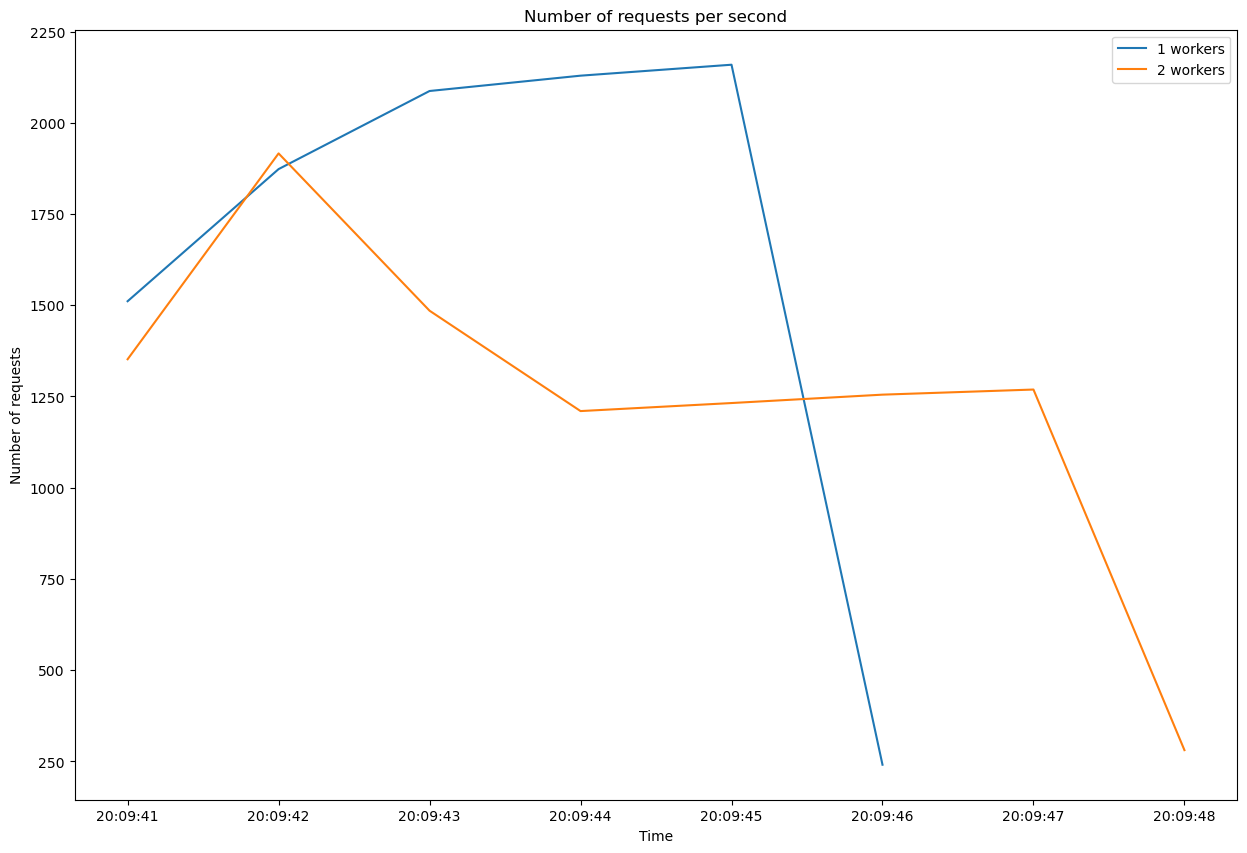

In [15]:
fig = plt.figure(figsize=(15, 10))
for worker in normalized_time_df['workers'].unique():
  temp = normalized_time_df[normalized_time_df['workers'] == worker]
  temp.index = temp['created_at']
  temp = temp.resample('1s').size()
  plt.plot(temp, label=f'{worker} workers')

plt.title('Number of requests per second')
plt.xlabel('Time')
plt.ylabel('Number of requests')
plt.legend()
plt.show()


In [12]:
fig = plt.figure(figsize=(15, 10))
for worker in boxdf['workers'].unique():
  temp = boxdf[boxdf['workers'] == worker]
  temp.index = temp['created_at']
  temp = temp.resample('1s').size()
  plt.plot(temp, label=f'{worker} workers')


NameError: name 'boxdf' is not defined

<Figure size 1500x1000 with 0 Axes>